In [3]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from plot_config import line_colors, lr_line_style, zs_line_style, ccs_line_style, num_hidden_layers, layers_arr

In [2]:
def load_data(data, train_dataset, test_dataset, reporter: str, path: str):
    data[(train_dataset, test_dataset, reporter)] = pd.read_csv(path)

In [46]:
data = {}

for d in [0,10,30,50]:

    dataset = f"imdb_misspelled_{d}"

    ccs_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_{d}/ccs/eval.csv'
    vinc_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_{d}/vinc/eval.csv'

    load_data(data, dataset, dataset, 'ccs', ccs_path)
    load_data(data, dataset, dataset, 'vinc', vinc_path)


origin_dataset_imdb = "imdb_misspelled_0"
for d in [10,30,50]:
    dataset = f"imdb_misspelled_{d}"
    vinc_transfer_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_0/vinc/transfer_eval/sethapun/imdb_misspelled_{d}/eval.csv'
    ccs_transfer_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_0/ccs/transfer_eval/sethapun/imdb_misspelled_{d}/eval.csv'
    load_data(data, origin_dataset_imdb, dataset, 'vinc', vinc_transfer_path)
    load_data(data, origin_dataset_imdb, dataset, 'ccs', ccs_transfer_path)

origin_dataset_arith = "arith1000"
for d in [0,10,30,50]:
    dataset = f"imdb_misspelled_{d}" 
    vinc_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to1000/vinc/transfer_eval/sethapun/imdb_misspelled_{d}/eval.csv'
    ccs_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to1000/ccs/transfer_eval/sethapun/imdb_misspelled_{d}/eval.csv'
    load_data(data, origin_dataset_arith, dataset, 'vinc', vinc_path_transfer)
    load_data(data, origin_dataset_arith, dataset, 'ccs', ccs_path_transfer)

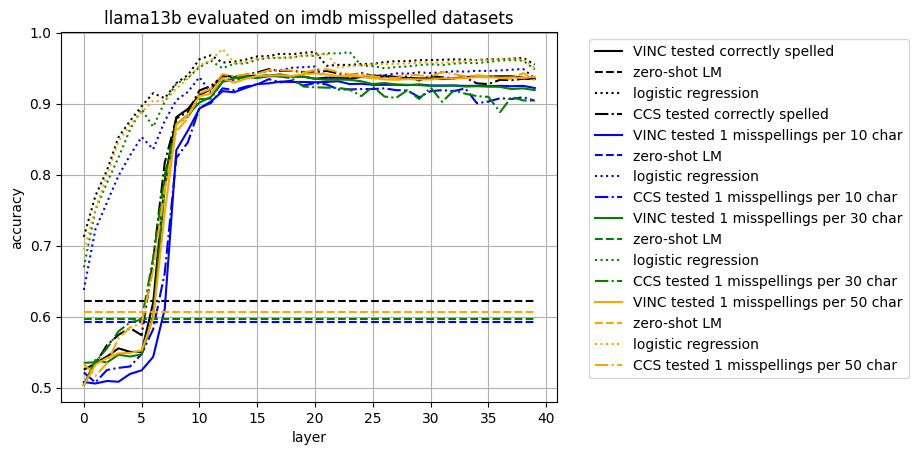

In [25]:
fig, ax = plt.subplots()
ax.set_title(fr"llama13b evaluated on imdb misspelled datasets")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([0,10,30,50]):
    dataset = f"imdb_misspelled_{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    if d == 0:
        ax.plot(layers, acc, label=f'VINC tested correctly spelled', color=line_color)
    else: 
        ax.plot(layers, acc, label=f'VINC tested 1 misspellings per {d} char', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
    experiment = data[(dataset, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc']
    if d == 0:
        ax.plot(layers, acc, label=f'CCS tested correctly spelled', color=line_color, linestyle=ccs_line_style)
    else: 
        ax.plot(layers, acc, label=f'CCS tested 1 misspellings per {d} char', color=line_color, linestyle=ccs_line_style)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

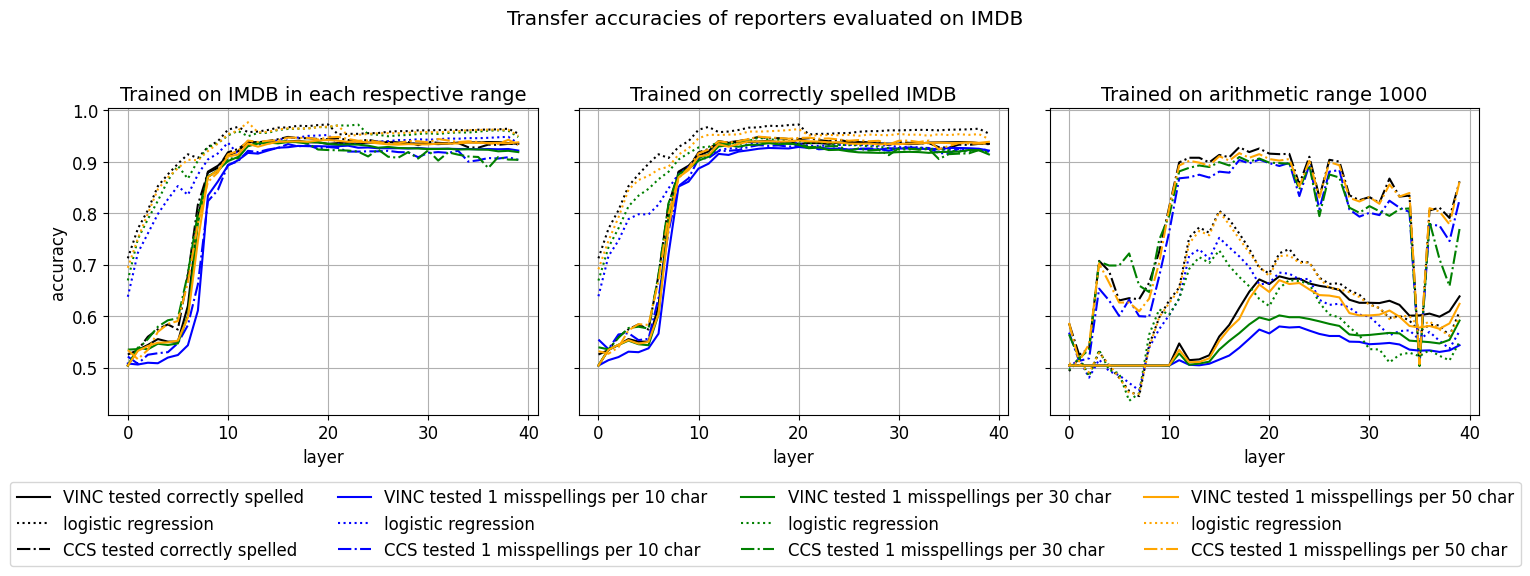

In [65]:
# trained and tested vs transfer

fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey = True)

# Set big title for the whole figure
fig.suptitle("Transfer accuracies of reporters evaluated on IMDB")

ax = axs[0]
ax.set_title(fr"Trained on IMDB in each respective range")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([0,10,30,50]):
    dataset = f"imdb_misspelled_{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    if d == 0:
        ax.plot(layers, acc, label=f'VINC tested correctly spelled', color=line_color)
    else: 
        ax.plot(layers, acc, label=f'VINC tested 1 misspellings per {d} char', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
    experiment = data[(dataset, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc']
    if d == 0:
        ax.plot(layers, acc, label=f'CCS tested correctly spelled', color=line_color, linestyle=ccs_line_style)
    else: 
        ax.plot(layers, acc, label=f'CCS tested 1 misspellings per {d} char', color=line_color, linestyle=ccs_line_style)


        
ax = axs[1]
ax.set_title(fr"Trained on correctly spelled IMDB")
ax.set_xlabel("layer")
ax.grid(True)

for i,d in enumerate([0,10,30,50]):
    dataset = f"imdb_misspelled_{d}"

    experiment = data[(origin_dataset_imdb, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    if d == 0:
        ax.plot(layers, acc, label=f'VINC tested correctly spelled', color=line_color)
    else: 
        ax.plot(layers, acc, label=f'VINC tested 1 misspellings per {d} char', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
    experiment = data[(origin_dataset_imdb, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc']
    ax.plot(layers, acc, label=f'CCS tested 1 misspellings per {d} char', color=line_color, linestyle=ccs_line_style)

ax = axs[2]
ax.set_title(fr"Trained on arithmetic range 1000")
ax.set_xlabel("layer")
ax.grid(True)

for i,d in enumerate([0,10,30,50]):
    origin_dataset = "arith1000"
    dataset = f"imdb_misspelled_{d}"

    experiment = data[(origin_dataset_arith, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    
    if d == 0:
        ax.plot(layers, acc, label=f'VINC tested correctly spelled', color=line_color)
    else: 
        ax.plot(layers, acc, label=f'VINC tested 1 misspellings per {d} char', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)

    experiment = data[(origin_dataset_arith, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc']
    if d == 0:
        ax.plot(layers, acc, label=f'CCS tested correctly spelled', color=line_color, linestyle=ccs_line_style)
    else: 
        ax.plot(layers, acc, label=f'CCS tested 1 misspellings per {d} char', color=line_color, linestyle=ccs_line_style)

        
handles, labels = axs[2].get_legend_handles_labels()  # Assuming all subplots have the same legend
fig.legend(handles, labels, bbox_to_anchor=(0.5,-0.15), loc='lower center', ncol=len(labels)/3)

# Adjust the layout to make room for the legend
fig.subplots_adjust(bottom = 0.2)

fig.tight_layout(pad=2) 

plt.rcParams.update({'font.size': 12})    
plt.show()

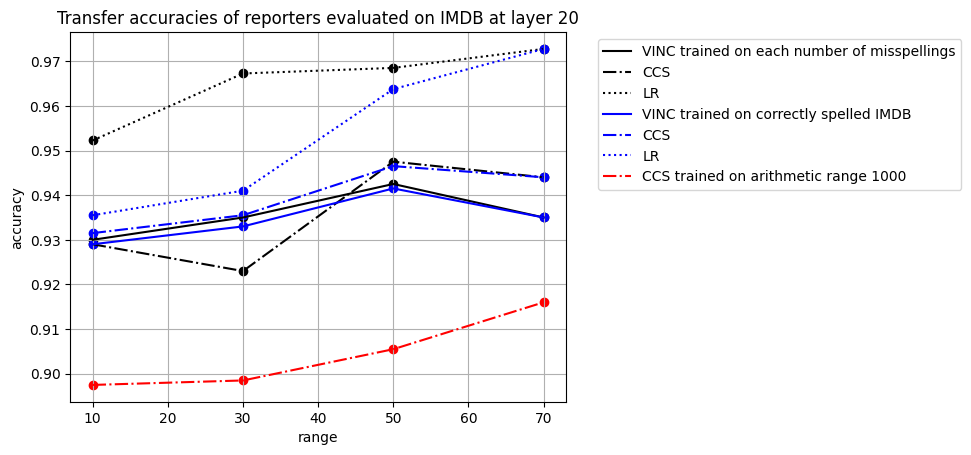

In [54]:
# transfer at layer 20

fig, ax = plt.subplots()
ax.set_title(fr"Transfer accuracies of reporters evaluated on IMDB at layer 20")
ax.set_xlabel("range")
ax.set_ylabel("accuracy")
ax.grid(True)

layer = 20

# respective
acc_lr = []
acc_vinc = []
acc_ccs = []

# transfer from imdb0
acc_lr_transfer = []
acc_vinc_transfer = []
acc_ccs_transfer = []

# transfer from arithmetic ccs
acc_ccs_arith = []


d_arr = [10,30,50,70]

for d in d_arr:

    if d == 70:
        d = 0
    dataset = f"imdb_misspelled_{d}"

    #origin
    experiment = data[(dataset, dataset, 'vinc')]
    acc_vinc.append(experiment.loc[layer, 'acc'])
    acc_lr.append(experiment.loc[layer, 'lr_acc'])
    experiment = data[(dataset, dataset, 'ccs')]
    acc_ccs.append(experiment.loc[layer, 'acc'])

    #transfer_imdb
    experiment = data[(origin_dataset_imdb, dataset, 'vinc')]
    acc_vinc_transfer.append(experiment.loc[layer, 'acc'])
    acc_lr_transfer.append(experiment.loc[layer, 'lr_acc'])
    experiment = data[(origin_dataset_imdb, dataset, 'ccs')]
    acc_ccs_transfer.append(experiment.loc[layer, 'acc'])

    #transfer_arith
    experiment = data[(origin_dataset_arith, dataset, 'ccs')]
    acc_ccs_arith.append(experiment.loc[layer, 'acc'])

ax.plot(d_arr, acc_vinc, label=f'VINC trained on each number of misspellings', color = 'k')
ax.scatter(d_arr, acc_vinc, color = 'k')
ax.plot(d_arr, acc_ccs, label=f'CCS', color = 'k', linestyle=ccs_line_style)
ax.scatter(d_arr, acc_ccs, color = 'k')
ax.plot(d_arr, acc_lr, label=f'LR', color = 'k', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr, color = 'k')

ax.plot(d_arr, acc_vinc_transfer, label=f'VINC trained on correctly spelled IMDB', color = 'b')
ax.scatter(d_arr, acc_vinc_transfer, color = 'b')
ax.plot(d_arr, acc_ccs_transfer, label=f'CCS', color = 'b', linestyle=ccs_line_style)
ax.scatter(d_arr, acc_ccs_transfer, color = 'b')
ax.plot(d_arr, acc_lr_transfer, label=f'LR', color = 'b', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr_transfer, color = 'b')

ax.plot(d_arr, acc_ccs_arith, label=f'CCS trained on arithmetic range 1000', color = 'r', linestyle=ccs_line_style)
ax.scatter(d_arr, acc_ccs_arith, color = 'r')
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

VINC and CCS generalize quite well, but LR is prone to overfitting???